In [1]:
# Logistic Regression
# Dataset : Pokemon.csv from https://www.kaggle.com/abcsds/pokemon
# We'll be predicting whether a pokemon is legendary or not by his Total Points and Attack Points

In [19]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [3]:
# Import data
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
# Some data preprocessing
df1 = df.iloc[:, [4, 6, 12]]
df1 = df1.dropna()
x = df1.iloc[:, 0:2].values
y = df1.iloc[:, 2].values.astype(int)

Text(0,0.5,'Is Legendary?')

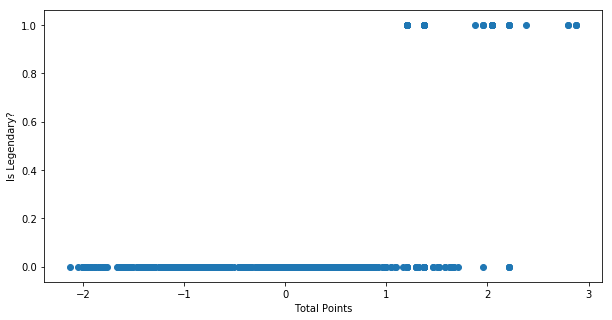

In [39]:
# Some visualizations
plt.scatter(x[:, 0:1], y)
plt.xlabel('Total Points')
plt.ylabel('Is Legendary?')

Text(0,0.5,'Is Legendary?')

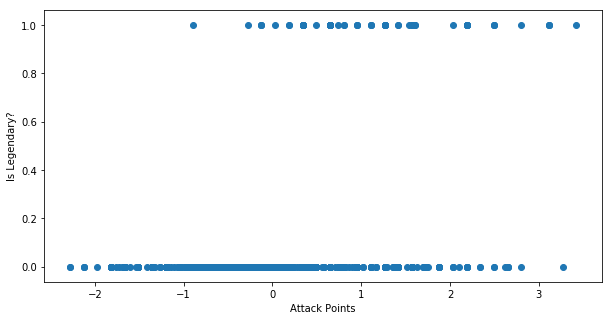

In [37]:
plt.scatter(x[:, 1:2], y)
plt.xlabel('Attack Points')
plt.ylabel('Is Legendary?')

In [14]:
# We have to apply feature scaling to 'X' for logistic Regression
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler() 
x = sc_x.fit_transform(x) 

D:\tools\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
# Train logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier = classifier.fit(x, y)


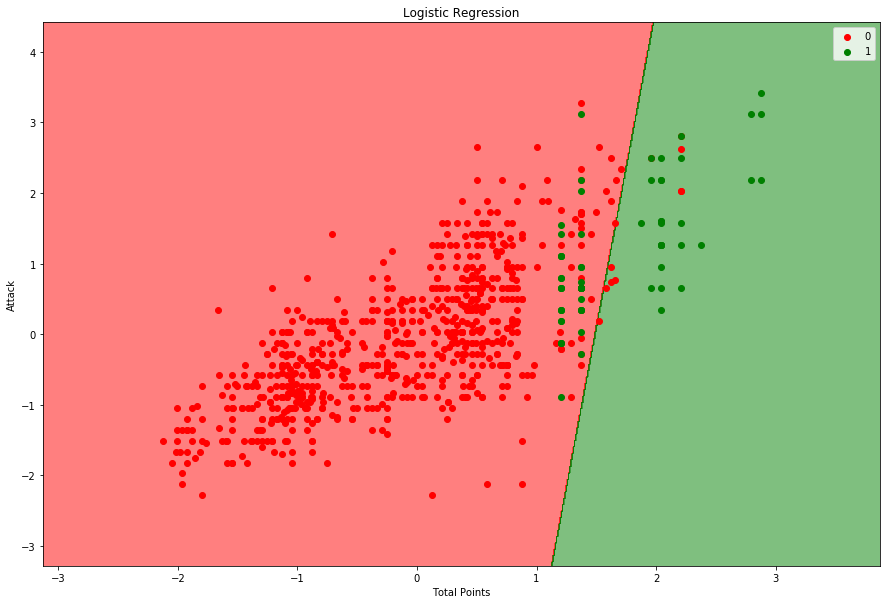

In [27]:
# Visualization template taken from this course : https://www.udemy.com/machinelearning/
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = x, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression')
plt.xlabel('Total Points')
plt.ylabel('Attack')
plt.legend()
plt.show()


In [33]:
# Error calculation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, classifier.predict(x))
err = cm[0][1] + cm[1][0]
print("total error: ", err)
print("accuracy of model: ", 100*(len(x)-err)/len(x), "%")

total error:  47
accuracy of model:  94.125 %
